## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Importing The files 
Here, I load the three files needed for the competition
- sample_submission.csv shows the format of how you submit the predictions for each traveller ID
- train.csv is the file containing the data for training the model
- test.csv is the file containing the data for prediction

In [2]:
sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
sample.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0


## Exploring and Checking for Nan values

In [4]:
#This shows where cabin is not having the NaN in the train dataset

train[train.cabin.notnull()].head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
19,39,1,"Brandeis, Mr. Emil",male,48.0,0,0,PC 17591,50.4958,B10,C,NaN,0
20,30,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,NaN,0
21,242,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C,11,1
24,136,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C,B,1
32,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,0


In [5]:
test.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN


In [6]:
train.shape

(916, 13)

In [7]:
test.shape

(393, 12)

We examine the number of missing values for each columns in the train dataset

In [8]:
train.isnull().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                 187
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  1
cabin               712
embarked              1
MedBoat             589
Survived              0
dtype: int64

Checking the data types for each columns to know what we are to deal with 

In [9]:
train.dtypes

traveller_ID          int64
ticket_class          int64
name                 object
sex                  object
age                 float64
Siblings_spouses      int64
Parchil               int64
TickNum              object
fare                float64
cabin                object
embarked             object
MedBoat              object
Survived              int64
dtype: object

Exploring the categories in MedBoat column in the train dataset. This shows the labels for each boat that was deployed for survival.

In [10]:
train['MedBoat'].value_counts()

13       30
15       25
4        22
C        22
10       21
11       20
5        20
3        18
14       17
D        16
9        16
16       14
8        13
7        13
6        12
2        12
12       11
A         9
B         6
1         5
13 15     2
15 16     1
5 7       1
8 10      1
Name: MedBoat, dtype: int64

The cabin columns contains the labels for each private room or compartment in the ship

In [11]:
test.cabin.value_counts()

B96 B98    2
C32        2
C55 C57    2
D          2
C125       2
          ..
E31        1
A24        1
C50        1
B80        1
C86        1
Name: cabin, Length: 76, dtype: int64

## Showing the relationship between data points with the survived column

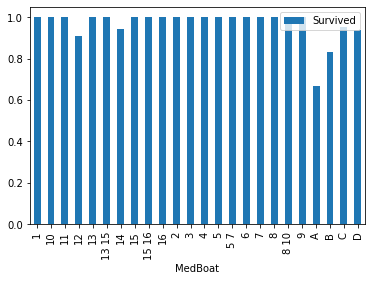

In [12]:
med= train.pivot_table(index='MedBoat',values='Survived')
med.plot.bar()

From the titanic movie, majority of those who survived had access to the medical boat.The plot above confirms that those who survived thad access to the boat.  

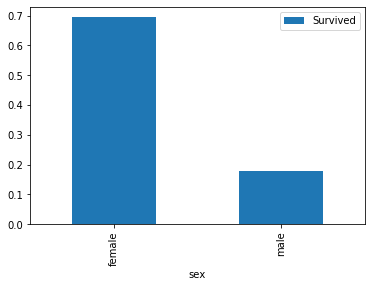

In [13]:
sex = train.pivot_table(index='sex',values='Survived')
sex.plot.bar()

The above shows that Females survived more than males. This is because Women and children was considered to first to get acesss to the boat before others.

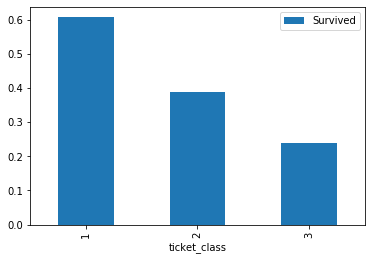

In [14]:
ticketclass = train.pivot_table(index='ticket_class',values='Survived')
ticketclass.plot.bar()

Those with ticket class 1 survived more, followed by the the ticket class 2 persons and lastly ticket class 3.

In [15]:
train.Siblings_spouses.value_counts()

0    605
1    233
2     33
4     17
3     17
8      7
5      4
Name: Siblings_spouses, dtype: int64

The above tells us that 605 persons boarded the boat alone, which has is the highest number in the boat followed by persons who boarded with just a person having a number of 233. 

In [16]:
train['TickNum'].value_counts()

CA. 2343     9
PC 17608     7
3101295      6
347077       6
4133         5
            ..
349237       1
248733       1
367231       1
A/4 45380    1
PC 17595     1
Name: TickNum, Length: 694, dtype: int64

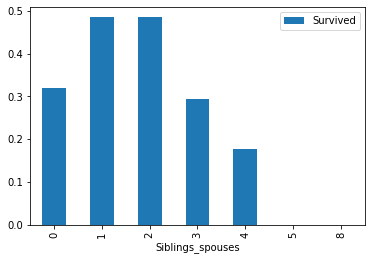

In [17]:
g = train.pivot_table(index='Siblings_spouses',values='Survived')
g.plot.bar()

It shows here that persons who boarded boat with 1 or 2 persons had higher chances of surviving

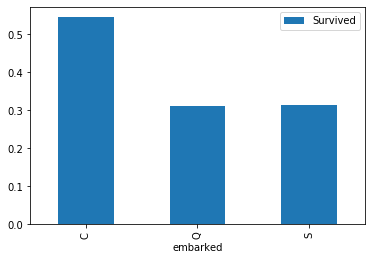

In [18]:
e = train.pivot_table(index = 'embarked',values='Survived')
e.plot.bar()

Those whose port of embarkation was Cherbourg had higher chances of surviving than the rest

## Feature Engineering
Here, I added some features, dropped some columns and did some preprocessing on the both the train and test dataset

In [19]:
# Here using regular expression to extract the title of each titles from the names e.g Mr,Mrs,Col etc.
# So as to categorise the calibers of people in the ship for the analysi and prediction.

train['title']=train['name'].str.extract(' ([A-Za-z]+)\.',expand=False)
test['title']=test['name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [20]:
train.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived,title
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0,Mr
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0,Mr
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1,Miss
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0,Miss
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0,Miss


In [22]:
test['title'].value_counts()

Mr        227
Miss       76
Mrs        64
Master     20
Dona        1
Major       1
Col         1
Capt        1
Mlle        1
Rev         1
Name: title, dtype: int64

In [23]:
test.title.nunique()   ## this gives the number of unique elements in that column

10

In [24]:
modtrain = {'Major':'official','Don':'official','Countess':'official','Master':'Master','Dr':'official','Rev':'official',
            'Col':'official','Sir':'official',
            'Jonkheer':'official','Lady':'official','Ms':'Miss','Mlle':'Miss',
            'Mme':'Mrs','Mr':'Mr','Mrs':'Mrs','Miss':'Miss'}
len(modtrain)

16

In [25]:
# Here mapping each keys to obtain the values

train['title'] = train['title'].map(modtrain)
train['title'].value_counts()

Mr          530
Miss        187
Mrs         134
Master       41
official     24
Name: title, dtype: int64

In [26]:
modtest = {'Major':'official','Master':'Master','Rev':'official','Col':'official',
         'Capt':'official','Dona':'official',
         'Mlle':'Miss','Mr':'Mr','Mrs':'Mrs','Miss':'Miss'}
len(modtest)

10

In [27]:
test['title'] = test['title'].map(modtest)
test['title'].value_counts()

Mr          227
Miss         77
Mrs          64
Master       20
official      5
Name: title, dtype: int64

In [28]:
combine = [train,test]
for data in combine:
    data.drop('name',inplace=True,axis=1)
    
train.head()

,traveller_ID,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived,title
0,1214,3,male,NaN,0,0,315037,8.6625,NaN,S,NaN,0,Mr
1,677,3,male,26.0,0,0,349224,7.8958,NaN,S,NaN,0,Mr
2,534,2,female,19.0,0,0,250655,26.0000,NaN,S,11,1,Miss
3,1174,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0,Miss
4,864,3,female,28.0,0,0,347086,7.7750,NaN,S,NaN,0,Miss


In [29]:
# filling embarked with the most frequent

train.embarked = train.embarked.fillna('S')
train.embarked.isna().sum()

0

In [30]:
test.embarked = test.embarked.fillna('S')
test.embarked.isna().sum()

0

In [31]:
# i filled the with unknown as it takes the first letters
combine = [train,test]
for data in combine:
    data.cabin = data.cabin.str[0].fillna('Unknown')
train.head()

,traveller_ID,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived,title
0,1214,3,male,NaN,0,0,315037,8.6625,Unknown,S,NaN,0,Mr
1,677,3,male,26.0,0,0,349224,7.8958,Unknown,S,NaN,0,Mr
2,534,2,female,19.0,0,0,250655,26.0000,Unknown,S,11,1,Miss
3,1174,3,female,NaN,8,2,CA. 2343,69.5500,Unknown,S,NaN,0,Miss
4,864,3,female,28.0,0,0,347086,7.7750,Unknown,S,NaN,0,Miss


In [32]:
# filling the medboat column with unknown type since they were empty

train.MedBoat = train.MedBoat.fillna('Unknown type')
test.MedBoat = test.MedBoat.fillna('Unknown type')

In [33]:
test.head()

,traveller_ID,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,title
0,1148,3.0,male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,Unknown,S,Unknown type,Mr
1,1049,3.0,male,20.0,1.0,1.0,2653,15.7417,Unknown,C,C,Mr
2,982,3.0,male,NaN,0.0,0.0,349235,7.8958,Unknown,S,Unknown type,Mr
3,808,3.0,male,NaN,0.0,0.0,A/5 1478,8.0500,Unknown,S,Unknown type,Mr
4,1195,3.0,male,NaN,0.0,0.0,370374,7.7500,Unknown,Q,Unknown type,Mr


In [34]:
## having train and test cases for backfilling,median,mean

# bfill
trainb = train.copy()
testb = test.copy()
combine = [trainb,testb]
for df in combine:
    df.age = df.age.fillna(method='bfill')
    df.fare = df.fare.fillna(method='bfill')
    
# mean
trainm = train.copy()
testm = test.copy()
combine = [trainm,testm]
for df in combine:
    df.age = df.age.fillna(df.age.mean())
    df.fare = df.fare.fillna(df.fare.mean())
    
# median
traind = train.copy()
testd = test.copy()
combine = [traind,testd]
for df in combine:
    df.age = df.age.fillna(df.age.median())
    df.fare = df.fare.fillna(df.fare.median())

In [35]:
## this uses the entries and adds as a column to the dataset having it entries as 0 and 1
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(column_name,axis=1)
    return df

In [36]:
#### train bfill, test bfill

trainb = create_dummies(trainb,'cabin')
trainb = create_dummies(trainb,'MedBoat')

testb = create_dummies(testb,'cabin')
testb = create_dummies(testb,'MedBoat')

In [37]:
testb.head()

,traveller_ID,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,title,...,MedBoat_6,MedBoat_7,MedBoat_8,MedBoat_9,MedBoat_A,MedBoat_B,MedBoat_C,MedBoat_C D,MedBoat_D,MedBoat_Unknown type
0,1148,3.0,male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,S,Mr,...,0,0,0,0,0,0,0,0,0,1
1,1049,3.0,male,20.0,1.0,1.0,2653,15.7417,C,Mr,...,0,0,0,0,0,0,1,0,0,0
2,982,3.0,male,45.0,0.0,0.0,349235,7.8958,S,Mr,...,0,0,0,0,0,0,0,0,0,1
3,808,3.0,male,45.0,0.0,0.0,A/5 1478,8.0500,S,Mr,...,0,0,0,0,0,0,0,0,0,1
4,1195,3.0,male,45.0,0.0,0.0,370374,7.7500,Q,Mr,...,0,0,0,0,0,0,0,0,0,1


In [38]:
#### train mean, test mean

trainm = create_dummies(trainm,'cabin')
trainm = create_dummies(trainm,'MedBoat')

testm = create_dummies(testm,'cabin')
testm = create_dummies(testm,'MedBoat')

In [39]:
trainm.head()

,traveller_ID,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,Survived,...,MedBoat_6,MedBoat_7,MedBoat_8,MedBoat_8 10,MedBoat_9,MedBoat_A,MedBoat_B,MedBoat_C,MedBoat_D,MedBoat_Unknown type
0,1214,3,male,29.102309,0,0,315037,8.6625,S,0,...,0,0,0,0,0,0,0,0,0,1
1,677,3,male,26.000000,0,0,349224,7.8958,S,0,...,0,0,0,0,0,0,0,0,0,1
2,534,2,female,19.000000,0,0,250655,26.0000,S,1,...,0,0,0,0,0,0,0,0,0,0
3,1174,3,female,29.102309,8,2,CA. 2343,69.5500,S,0,...,0,0,0,0,0,0,0,0,0,1
4,864,3,female,28.000000,0,0,347086,7.7750,S,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
#### train median, test median

traind = create_dummies(traind,'cabin')
traind = create_dummies(traind,'MedBoat')

testd = create_dummies(testd,'cabin')
testd = create_dummies(testd,'MedBoat')

In [42]:
traind.head()

,traveller_ID,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,Survived,...,MedBoat_6,MedBoat_7,MedBoat_8,MedBoat_8 10,MedBoat_9,MedBoat_A,MedBoat_B,MedBoat_C,MedBoat_D,MedBoat_Unknown type
0,1214,3,male,28.0,0,0,315037,8.6625,S,0,...,0,0,0,0,0,0,0,0,0,1
1,677,3,male,26.0,0,0,349224,7.8958,S,0,...,0,0,0,0,0,0,0,0,0,1
2,534,2,female,19.0,0,0,250655,26.0000,S,1,...,0,0,0,0,0,0,0,0,0,0
3,1174,3,female,28.0,8,2,CA. 2343,69.5500,S,0,...,0,0,0,0,0,0,0,0,0,1
4,864,3,female,28.0,0,0,347086,7.7750,S,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
### sklearn library
### this labels the entries especially categorical starting as 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
## trainb, testb

trainb.sex = le.fit_transform(trainb.sex)
trainb.embarked = le.fit_transform(trainb.embarked)
trainb.title = le.fit_transform(trainb.title)


testb.sex = le.fit_transform(testb.sex)
testb.embarked = le.fit_transform(testb.embarked)
testb.title = le.fit_transform(testb.title)

In [45]:
## train mean, test mean

trainm.sex = le.fit_transform(trainm.sex)
trainm.embarked = le.fit_transform(trainm.embarked)
trainm.title = le.fit_transform(trainm.title)

testm.sex = le.fit_transform(testm.sex)
testm.embarked = le.fit_transform(testm.embarked)
testm.title = le.fit_transform(testm.title)

In [46]:
## train median, test median

traind.sex = le.fit_transform(traind.sex)
traind.embarked = le.fit_transform(traind.embarked)
traind.title = le.fit_transform(traind.title)

testd.sex = le.fit_transform(testd.sex)
testd.embarked = le.fit_transform(testd.embarked)
testd.title = le.fit_transform(testd.title)

## Selecting the columns for the model training

In [47]:
# selecting best columns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier(random_state = 1)    


def select_features(df):
    df = df.select_dtypes([np.number]).dropna(axis = 1)
    all_x = df.drop(['traveller_ID', 'Survived'], axis = 1)
    all_y = df['Survived']
    selector = RFECV(rf, cv = 10)
    selector.fit(all_x, all_y)
    optimized_columns = list(all_x.columns[selector.support_])
    print('best columns are: ', '{}'.format(optimized_columns))
    return optimized_columns

In [48]:
train_mean_col= select_features(trainm)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

best columns are:  ['ticket_class', 'sex', 'age', 'Siblings_spouses', 'Parchil', 'fare', 'embarked', 'title', 'cabin_Unknown', 'MedBoat_10', 'MedBoat_11', 'MedBoat_12', 'MedBoat_13', 'MedBoat_14', 'MedBoat_15', 'MedBoat_16', 'MedBoat_3', 'MedBoat_4', 'MedBoat_5', 'MedBoat_9', 'MedBoat_A', 'MedBoat_C', 'MedBoat_D', 'MedBoat_Unknown type']


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
len(train_mean_col)

24

In [50]:
train_median_col = select_features(traind)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

best columns are:  ['ticket_class', 'sex', 'age', 'Siblings_spouses', 'Parchil', 'fare', 'embarked', 'title', 'cabin_A', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_Unknown', 'MedBoat_1', 'MedBoat_10', 'MedBoat_11', 'MedBoat_12', 'MedBoat_13', 'MedBoat_14', 'MedBoat_15', 'MedBoat_16', 'MedBoat_2', 'MedBoat_3', 'MedBoat_4', 'MedBoat_5', 'MedBoat_7', 'MedBoat_8', 'MedBoat_9', 'MedBoat_A', 'MedBoat_B', 'MedBoat_C', 'MedBoat_D', 'MedBoat_Unknown type']


In [51]:
len(train_median_col)

35

In [54]:
train_bfill_col = select_features(trainb)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

best columns are:  ['MedBoat_Unknown type']


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

In [56]:
train_bfill_col

['MedBoat_Unknown type']

In [57]:
# getting the general column though out of the 3 best features,I selected the one with the median
# below, i tried letting the columns of the train be the same as the test
col = []
for t in trainb.columns:
    if t in testb.columns:
        col.append(t)
# next, I compared the columns from `col` with `train_median_col`        
coln = []
for t in col:
    if t in train_median_col:
        coln.append(t)
len(coln)

34

In [58]:
# Separating the target from the train model
Xb = trainb[coln]
yb = trainb.Survived
testbn = testb[coln]

Xm = trainm[coln]
ym = trainm.Survived
testmn = testm[coln]

Xd = traind[coln]
yd = traind.Survived
testdn = testd[coln]

## Training and Predictions

In [59]:
## training the models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [60]:
from sklearn.model_selection import train_test_split
xbtr,xbt,ybtr,ybt = train_test_split(Xb,yb,test_size=0.2,random_state=42)
xmtr,xmt,ymtr,ymt = train_test_split(Xm,ym,test_size=0.2,random_state=42)
xdtr,xdt,ydtr,ydt = train_test_split(Xd,yd,test_size=0.2,random_state=42)

In [61]:
model = RandomForestClassifier()
model.fit(xmtr,ymtr)
y_pred = model.predict(xmt)
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(ymt, y_pred))
print("Precision: ", metrics.precision_score(ymt, y_pred))
print("Recall: ", metrics.recall_score(ymt, y_pred))
print("f1 score: ",metrics.f1_score(ymt,y_pred))

Accuracy:  0.9782608695652174
Precision:  0.96875
Recall:  0.96875
f1 score:  0.96875


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
## Here I performed GridSearchCV with 10 folds to select the best model and best hyperparameters for the model training
## and prediction

def select_model(df):
    all_x = df[coln]  ## selects the columns for training
    all_y = df['Survived']
    
    ## after the name of each models follows each parameters for the model name
    
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "C": np.logspace(-4,4,7),
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [1,2,3,4,5,6,7,8,9,10],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2,3,4, 5,6,7,8,9, 10,11,12,13],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },
        {
            "name": "XGBOOST",
            "estimator": XGBClassifier(),
            "hyperparameters":
                {
                    "max_depth": [1,2,3,5,10,11,12,15,30],
                    'n_estimators': [50,98,99,100,101,102,200],
                    'subsample': [0.1,0.5,0.8,1],
                    'learning rate': [0.01,0.045,0.05,0.1,0.03],
                    'min_child_weight': [1],
                    'reg_alpha': [0],
                    'reg_lambda': [1]
                }
        }
                                     
    ]
    for i in models:
        print(i['name'])
        print('----------')
        grid = GridSearchCV(i['estimator'], param_grid = i['hyperparameters'], cv = 10)
        grid.fit(all_x, all_y)
        i['best_parameters'] = grid.best_params_
        i['best_score'] = grid.best_score_
        i['best_model'] = grid.best_estimator_
        print('best parameters for this model are: ', i['best_parameters'])
        print('best score for this model is: ', i['best_score'])
        print('----------', '\n')
    return models

In [67]:
select_model(traind)

LogisticRegression
----------


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


best parameters for this model are:  {'C': 1.0, 'solver': 'newton-cg'}
best score for this model is:  0.9781659388646288
---------- 

KNeighborsClassifier
----------
best parameters for this model are:  {'algorithm': 'brute', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
best score for this model is:  0.8264192139737991
---------- 

RandomForestClassifier
----------


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters for this model are:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 10}
best score for this model is:  0.9792576419213974
---------- 

XGBOOST
----------


KeyboardInterrupt: 

In [70]:
select_model(trainb)

LogisticRegression
----------


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


best parameters for this model are:  {'C': 1.0, 'solver': 'newton-cg'}
best score for this model is:  0.9781659388646288
---------- 

KNeighborsClassifier
----------
best parameters for this model are:  {'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
best score for this model is:  0.8089519650655022
---------- 

RandomForestClassifier
----------


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters for this model are:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 8}
best score for this model is:  0.9792576419213974
---------- 

XGBOOST
----------


KeyboardInterrupt: 

In [ ]:
select_model(trainm)

So with gridsearchcv, the model with the best score is Random Forest.

In [105]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth= 9, max_features= 'log2',
                            min_samples_leaf= 8, min_samples_split=2, n_estimators =  10)

In [109]:
e = rfc.fit(Xd,yd)

Predicted outcomes

In [110]:
y_pred = e.predict(testdn)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [111]:
submit = pd.DataFrame({"traveller_ID":testd['traveller_ID'],'Survived':y_pred})
submit.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0


In [112]:
submit.to_csv('submission.csv',index=False)